# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook. 

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation (which is in contrast to traditional image processing, where the filters are designed by an expert).

In [1]:
# This cell is finished

from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

/tmp/ipykernel_770339/2994295117.py:8: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  image = misc.ascent()


In [2]:
# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss = signal.convolve2d(image, gaussFilter)
filterResponseSobelX = signal.convolve2d(image, sobelX)
filterResponseSobelY = signal.convolve2d(image, sobelY)

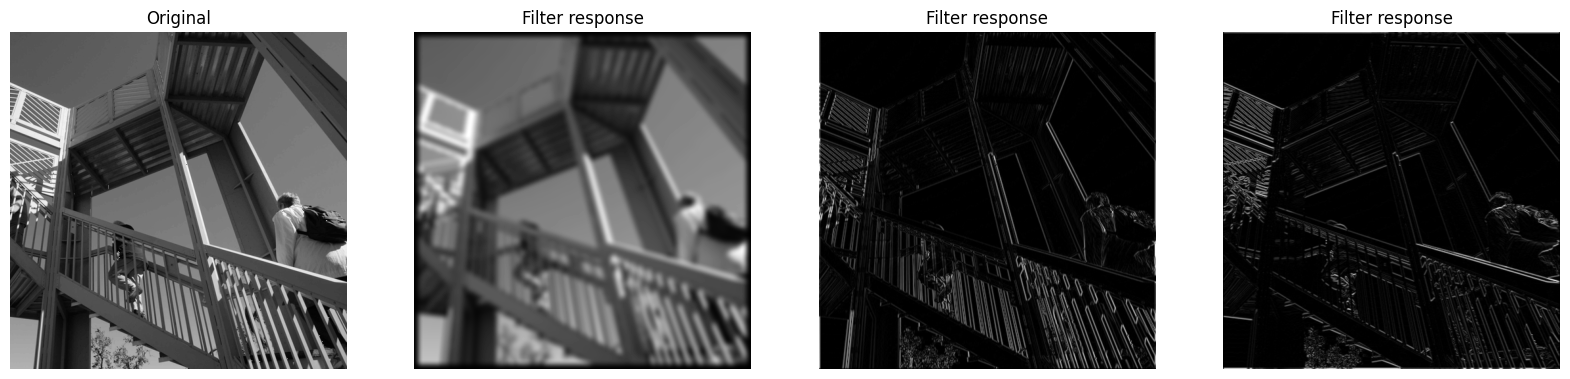

In [3]:
import matplotlib.pyplot as plt

# Show filter responses
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('Filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Filter response')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?

Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?

Question 3: What is the size of the different filters?

Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?

Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter? 

Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?


In [4]:
# Your code for checking sizes of image and filter responses

print(f"Shape of the orginal image: {image.shape}")
print(f"Size of the orginal image (total pixels): {image.size}")
print(f"Dimensions of data: {image.ndim}, 2d-data is only one channel.")
print("***************************************************")
print(f"Size of guassFilter: {gaussFilter.size}")
print(f"Size of SobelX: {sobelX.size}")
print(f"Size of SobelY: {sobelY.size}")
print("***************************************************")



Shape of the orginal image: (512, 512)
Size of the orginal image (total pixels): 262144
Dimensions of data: 2, 2d-data is only one channel.
***************************************************
Size of guassFilter: 225
Size of SobelX: 9
Size of SobelY: 9
***************************************************


#### **<span style="color:green">Answer:</span>**

**Question 1** 

* All filters goes through all pixels and calculates the scalar product between filter coefficients and signal values. The guassian filter has larger values in the center of the filter and smaller values at the edges, which result in a blurry image. The SobelX filter detects vertical lines and the SobelY filter detects horizontal lines.

**Question 2** 

* The shape of the orginal image is 512 x 512 (262 144 total pixels). The image have one channel and a color image normally have three channels. 


**Question 3** 

* The size of guassFilter is 15 x 15 (225 pixels), the size of SobelX is 3 x 3 (9 pixels) and the size of SobelY is 3 x 3 (9 pixels).


**Question 4** 

* The size of the filter response if mode = 'same' is the same size as orginal image (512 x 512).

**Question 5** 

* The size of the filter response if mode = 'valid' is 510 x 510, since we can not compute filter values in the edges of the orignal image.


**Question 6** 

* It can be problem since each layer will reduce the image size so in a CNN with many layers the last layer can have a lot smaller images than the orginal image.



##  Part 3: Get a graphics card

Skip this part if you run on a CPU (recommended)

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [50]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True) 

IndexError: list index out of range

##  Part 4: How fast is the graphics card?

Question 7: Why are the filters used for a color image of size 7 x 7 x 3, and not 7 x 7 ? 

Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?

Question 9: Do you think that a graphics card, compared to the CPU, is equally faster for convolving a batch of 1,000 images, compared to convolving a batch of 3 images? Motivate your answer.

#### **<span style="color:green">Answer:</span>**

**Question 7** 

* The fliter for a color image have size 7 x 7 x 3, since it have three different channels.

**Question 8** 

* The operation performerd by Conv2D is 2D convolution over the image. Conv2D does the same operations with different padding as standard ("valid"). Conv2d learns the filter, while signal.convolve2d takes a predefined filter as input. 


**Question 9** 

* We think that in a CPU 1000 images is slower than 3 images, since it can not convolve all images at once. In GPU it depenends how many cores there is, if it is over 1000 cores then it can run 1000 image as fast as 3 images, therefore the GPU should be fatser than CPU.


##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [97]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively, 
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

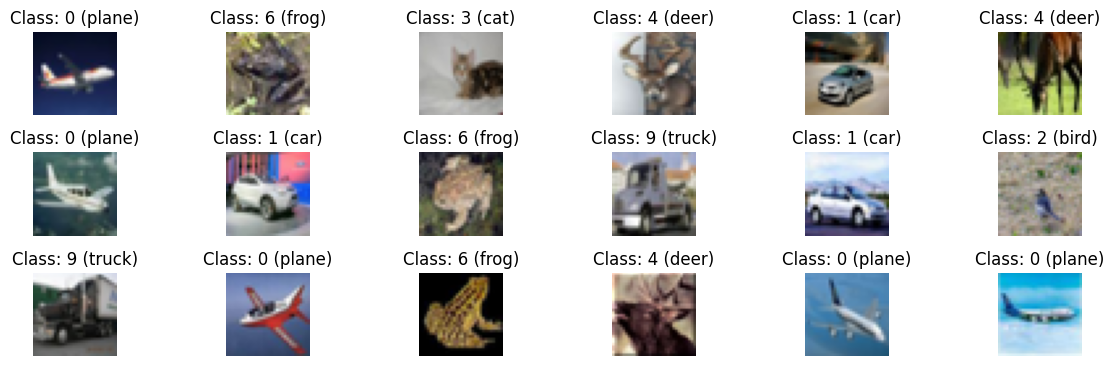

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [99]:
from sklearn.model_selection import train_test_split

# Your code for splitting the dataset
# Labb assistant told 25 % of the data = 25 % of the traindata.

Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.25 ,random_state=13)


# Print the size of training data, validation data and test data
print("Training images have size {}".format(Xtrain.shape))
print("Test images have size {}".format(Xtest.shape))
print("Validation images have size {}\n ".format(Xval.shape))


Training images have size (7500, 32, 32, 3)
Test images have size (2000, 32, 32, 3)
Validation images have size (2500, 32, 32, 3)
 


##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [100]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/api/utils/python_utils/#to_categorical-function

In [101]:
from tensorflow.keras.utils import to_categorical

# Print shapes before converting the labels
print("Train labels have size {} ".format(Ytrain.shape))
print("Test labels have size {} ".format(Ytest.shape))
print("Validation labels have size {} \n ".format(Yval.shape))


# Your code for converting Ytrain, Yval, Ytest to categorical
Ytrain = to_categorical(Ytrain, num_classes = 10)
Ytest = to_categorical(Ytest, num_classes = 10)
Yval = to_categorical(Yval, num_classes = 10)


# Print shapes after converting the labels
print("Train labels have size {} ".format(Ytrain.shape))
print("Test labels have size {} ".format(Ytest.shape))
print("Validation labels have size {} \n ".format(Yval.shape))



Train labels have size (7500, 1) 
Test labels have size (2000, 1) 
Validation labels have size (2500, 1) 
 
Train labels have size (7500, 10) 
Test labels have size (2000, 10) 
Validation labels have size (2500, 10) 
 


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3). 

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/api/layers/core_layers/dense/ and https://keras.io/api/layers/reshaping_layers/flatten/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/) , it relates to how many classes you have.

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

In [59]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01):

    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape
    model.add(Conv2D(filters = n_filters, kernel_size = (3,3),
                     padding = "same",
                     activation = "relu",
                     input_shape = input_shape))
    
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    
    
   
    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    for i in range(n_conv_layers-1):
        
        model.add(Conv2D(filters = n_filters * (1+i), kernel_size = (3,3),
                     padding = "same",
                     activation = "relu"))
        
        model.add(BatchNormalization())
        model.add(MaxPooling2D())
            
        
        
    
    # Add flatten layer
    model.add(Flatten())
    
    # Add intermediate dense layers
    for i in range(n_dense_layers):
        model.add(Dense(n_nodes, activation = "relu"))
        model.add(BatchNormalization())
        if(use_dropout):
            model.add(Dropout(0.5))
        
        
                  
    # Add final dense layer
    model.add(Dense(10, activation = "softmax"))
   
    # Compile model
    model.compile(loss=CategoricalCrossentropy(), optimizer = Adam(learning_rate = learning_rate), metrics = ["accuracy"])
    
    return model

In [60]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):
    
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

## 2 convolutional layers, no intermediate dense layers

In [58]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = (32,32,3)

# Build model
model1 = build_CNN(input_shape = input_shape, n_conv_layers = 2, n_dense_layers = 0)

# Train the model  using training data and validation data
history1 = model1.fit(Xtrain, Ytrain, validation_data = (Xval, Yval), batch_size = batch_size, epochs = epochs)

(32, 32, 3)

In [48]:
# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 4ms/step - loss: 1.7940 - accuracy: 0.5420
Test loss: 1.7940
Test accuracy: 0.5420


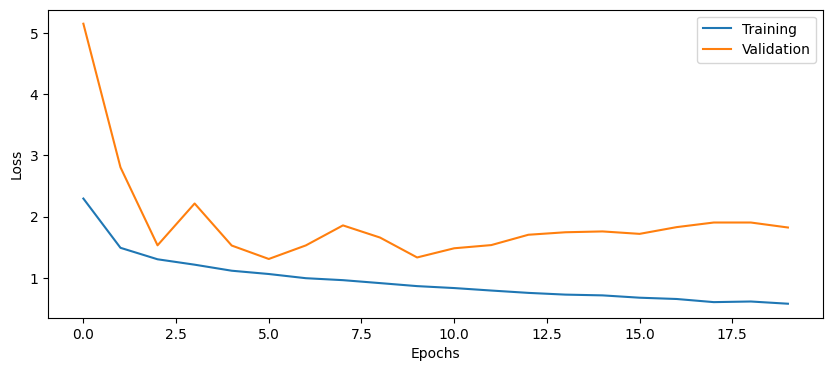

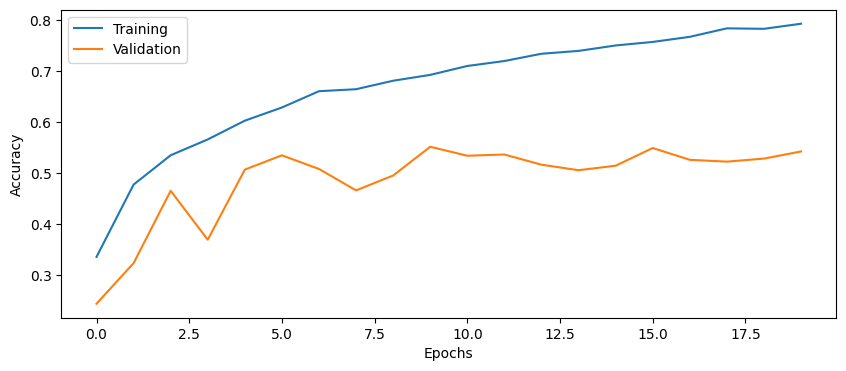

In [49]:
# Plot the history from the training run
plot_results(history1)

## Part 12: Improving performance

Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ? 

Question 10: How big is the difference between training and test accuracy?

Question 11: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?

#### **<span style="color:green">Answer:</span>**

Test accuracy is around 54 %, it is better than random guessing, but we are not satisfied.

**Question 10** 

* The training accuracy is 0.7935 and the difference is around 0.25. 

**Question 11** 

* We use a smaller batch size in this laboration, since we had 92 features per observation and in this lab we have 32 x 32 x 3 features which alot more than 92. This means our data is larger and therefore we need to use smaller batches to fit everything in memory.




## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [51]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = (32,32,3)

# Build model
model2 = build_CNN(input_shape = input_shape, n_conv_layers = 2, n_dense_layers = 1, n_nodes=50)

# Train the model  using training data and validation data
history2 = model2.fit(Xtrain, Ytrain, validation_data = (Xval, Yval), batch_size = batch_size, epochs = epochs)

Epoch 1/20
75/75 [==============================] - 4s 40ms/step - loss: 1.7326 - accuracy: 0.3896 - val_loss: 5.5857 - val_accuracy: 0.2304
Epoch 2/20
75/75 [==============================] - 3s 39ms/step - loss: 1.3347 - accuracy: 0.5239 - val_loss: 3.2934 - val_accuracy: 0.3396
Epoch 3/20
75/75 [==============================] - 3s 36ms/step - loss: 1.1761 - accuracy: 0.5809 - val_loss: 2.3855 - val_accuracy: 0.4036
Epoch 4/20
75/75 [==============================] - 3s 36ms/step - loss: 1.0329 - accuracy: 0.6352 - val_loss: 1.6954 - val_accuracy: 0.4804
Epoch 5/20
75/75 [==============================] - 3s 37ms/step - loss: 0.9295 - accuracy: 0.6639 - val_loss: 2.1791 - val_accuracy: 0.4368
Epoch 6/20
75/75 [==============================] - 3s 37ms/step - loss: 0.8111 - accuracy: 0.7116 - val_loss: 1.8297 - val_accuracy: 0.4868
Epoch 7/20
75/75 [==============================] - 3s 38ms/step - loss: 0.7001 - accuracy: 0.7523 - val_loss: 2.2477 - val_accuracy: 0.4524
Epoch 8/20
75

In [52]:
score = model2.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 5ms/step - loss: 3.2270 - accuracy: 0.5255
Test loss: 3.2270
Test accuracy: 0.5255


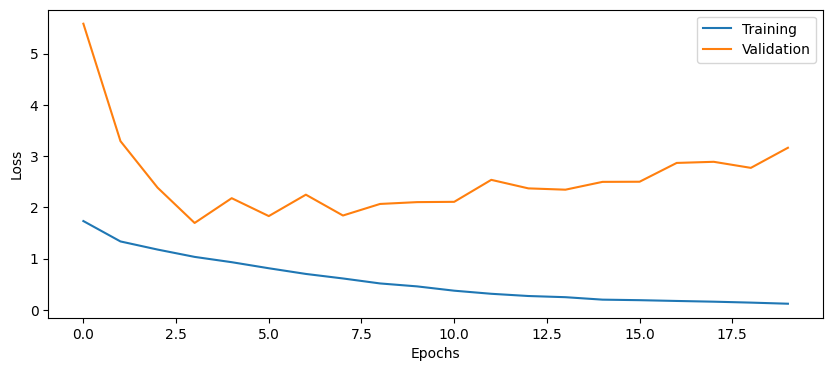

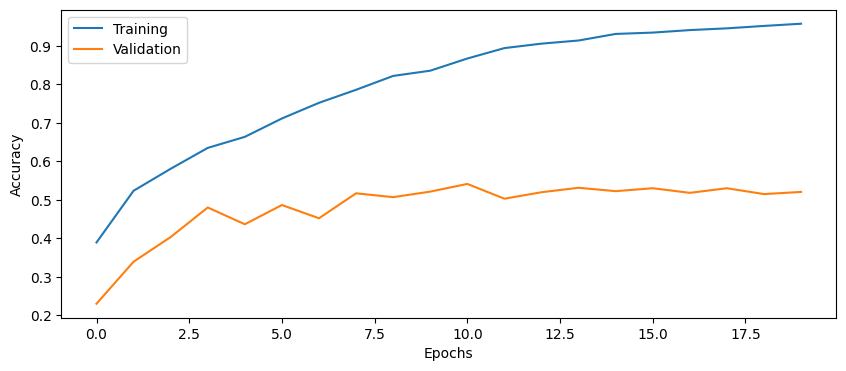

In [53]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [54]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = (32,32,3)

# Build model
model3 = build_CNN(input_shape = input_shape, n_conv_layers = 4, n_dense_layers = 1, n_nodes=50)

# Train the model  using training data and validation data
history3 = model3.fit(Xtrain, Ytrain, validation_data = (Xval, Yval), batch_size = batch_size, epochs = epochs)

Epoch 1/20
75/75 [==============================] - 5s 45ms/step - loss: 1.7877 - accuracy: 0.3629 - val_loss: 2.6829 - val_accuracy: 0.3512
Epoch 2/20
75/75 [==============================] - 3s 43ms/step - loss: 1.4264 - accuracy: 0.4831 - val_loss: 3.2006 - val_accuracy: 0.3184
Epoch 3/20
75/75 [==============================] - 3s 43ms/step - loss: 1.2729 - accuracy: 0.5389 - val_loss: 4.2941 - val_accuracy: 0.2768
Epoch 4/20
75/75 [==============================] - 3s 43ms/step - loss: 1.1419 - accuracy: 0.5941 - val_loss: 2.2374 - val_accuracy: 0.4236
Epoch 5/20
75/75 [==============================] - 3s 42ms/step - loss: 1.0345 - accuracy: 0.6261 - val_loss: 1.7923 - val_accuracy: 0.4904
Epoch 6/20
75/75 [==============================] - 3s 45ms/step - loss: 0.9357 - accuracy: 0.6679 - val_loss: 2.3089 - val_accuracy: 0.4244
Epoch 7/20
75/75 [==============================] - 3s 44ms/step - loss: 0.8648 - accuracy: 0.6915 - val_loss: 1.4983 - val_accuracy: 0.5480
Epoch 8/20
75

In [55]:
# Evaluate the trained model on test set, not used in training or validation
score = model3.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 5ms/step - loss: 2.6468 - accuracy: 0.5165
Test loss: 2.6468
Test accuracy: 0.5165


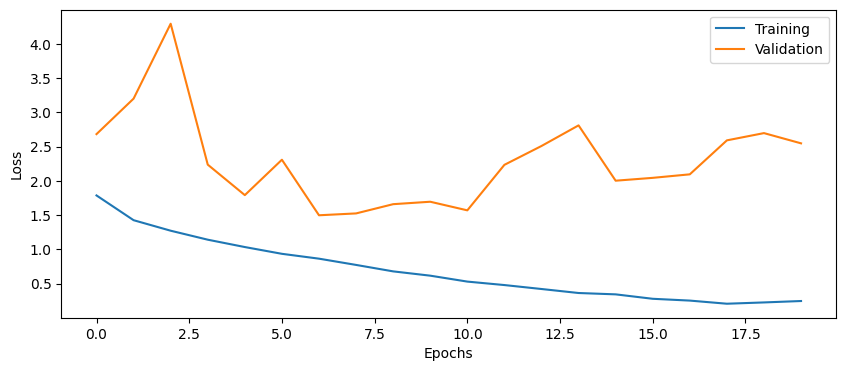

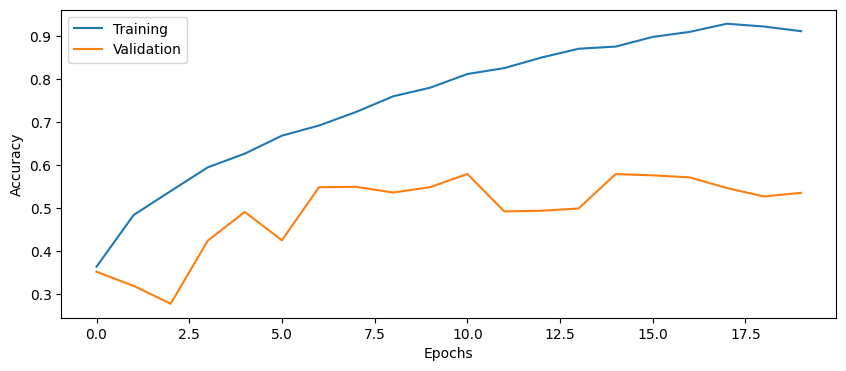

In [56]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

Question 12: How many trainable parameters does your network have? Which part of the network contains most of the parameters?

Question 13: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output? 

Question 14: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/

Question 15: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?

Question 16: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?

Question 17: How does MaxPooling help in reducing the number of parameters to train?

In [57]:
# Print network architecture

model3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_15 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 batch_normalization_16 (Bat  (None, 16, 16, 16)       64        
 chNormalization)                                                
                                                     

#### **<span style="color:green">Answer:</span>**


**Question 12** 

* The number of trainable parameters of our network have 31 764 parameters. The last convolutional layer contains most of the parameters, since it has most filters.

**Question 13** 

* The input and output of a Conv2D layer is the same, because padding = "same". The dimensions of the input and output are 32 x 32 x 3.

**Question 14** 

* The batch size is always the first dimension of each 4D tensor.

**Question 15** 

* The number of channels in the output layer is 128.

**Question 16** 

* The number of parameters is "the number of filters" times "**the number of channels**" times "the number of filter coefficients" plus bias.

**Question 17** 

* Maxpooling reduce the image size by downsampling the input.


##  Part 14: Dropout regularization

Add dropout regularization between each intermediate dense layer, dropout probability 50%.

Question 18: How much did the test accuracy improve with dropout, compared to without dropout?

Question 19: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?


## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [68]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = (32,32,3)

# Build model
model4 = build_CNN(input_shape = input_shape, n_conv_layers = 4, n_dense_layers = 1, n_nodes=50, use_dropout = True)

# Train the model  using training data and validation data
history4 = model4.fit(Xtrain, Ytrain, validation_data = (Xval, Yval), batch_size = batch_size, epochs = epochs)

Epoch 1/20
75/75 [==============================] - 5s 48ms/step - loss: 2.0964 - accuracy: 0.2693 - val_loss: 9.2249 - val_accuracy: 0.1476
Epoch 2/20
75/75 [==============================] - 3s 44ms/step - loss: 1.6442 - accuracy: 0.3971 - val_loss: 2.7226 - val_accuracy: 0.2836
Epoch 3/20
75/75 [==============================] - 3s 43ms/step - loss: 1.5073 - accuracy: 0.4492 - val_loss: 3.2495 - val_accuracy: 0.2664
Epoch 4/20
75/75 [==============================] - 3s 44ms/step - loss: 1.4017 - accuracy: 0.5000 - val_loss: 1.8165 - val_accuracy: 0.3912
Epoch 5/20
52/75 [===================>..........] - ETA: 0s - loss: 1.3220 - accuracy: 0.5121

KeyboardInterrupt: 

In [65]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 6ms/step - loss: 1.8944 - accuracy: 0.5195
Test loss: 1.8944
Test accuracy: 0.5195


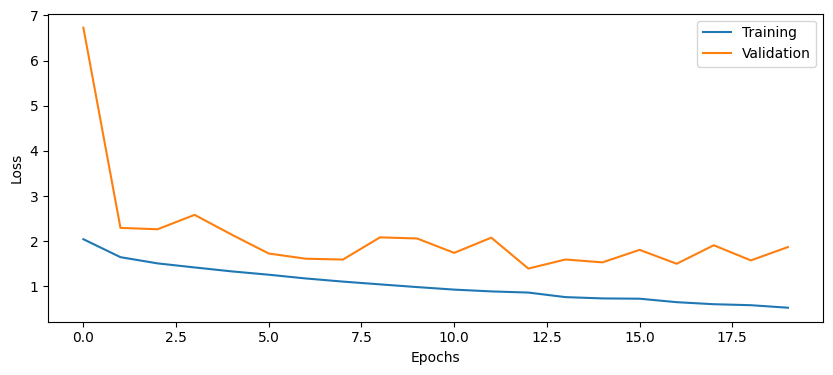

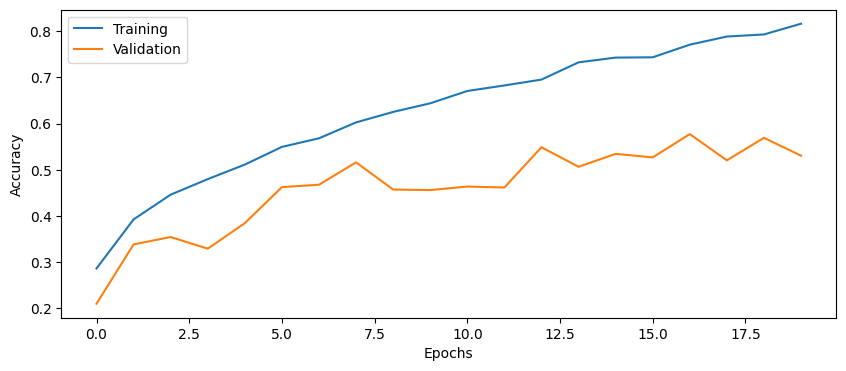

In [66]:
# Plot the history from the training run
plot_results(history4)

#### **<span style="color:green">Answer:</span>**


**Question 18** 

* The test accuracy went from 0.5165 to 0.5195 when we used dropout, not a big improvement.

**Question 19** 

* Other types of regularization could be more trainingdata, early stopping, data augmentation. We could add L2 regularization for the convolutional layers by adding the arguments "kernel_regularizer = l2(*lambda1*)" and "bias_regularizer = l2(*lambda2*)". *lambda1* and *lambda2* is how much we want to regularize.

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

Question 20: How high test accuracy can you obtain? What is your best configuration?

## Your best config

In [81]:
# Setup some training parameters
batch_size = 100
epochs = 30
input_shape = (32,32,3)

# Build model
model5 = build_CNN(input_shape = input_shape, n_conv_layers = 5, n_dense_layers = 3, n_nodes=64, use_dropout = True)

# Train the model  using training data and validation data
history5 = model5.fit(Xtrain, Ytrain, validation_data = (Xval, Yval), batch_size = batch_size, epochs = epochs)


Epoch 1/30
75/75 [==============================] - 6s 50ms/step - loss: 2.4074 - accuracy: 0.1637 - val_loss: 5.6284 - val_accuracy: 0.0748
Epoch 2/30
75/75 [==============================] - 4s 48ms/step - loss: 2.0044 - accuracy: 0.2229 - val_loss: 1.9575 - val_accuracy: 0.2456
Epoch 3/30
75/75 [==============================] - 4s 47ms/step - loss: 1.8937 - accuracy: 0.2632 - val_loss: 2.6132 - val_accuracy: 0.2224
Epoch 4/30
75/75 [==============================] - 3s 44ms/step - loss: 1.7716 - accuracy: 0.3141 - val_loss: 1.7410 - val_accuracy: 0.3512
Epoch 5/30
75/75 [==============================] - 3s 43ms/step - loss: 1.7077 - accuracy: 0.3472 - val_loss: 2.0600 - val_accuracy: 0.2696
Epoch 6/30
75/75 [==============================] - 3s 44ms/step - loss: 1.6450 - accuracy: 0.3693 - val_loss: 1.7560 - val_accuracy: 0.3504
Epoch 7/30
75/75 [==============================] - 3s 43ms/step - loss: 1.5603 - accuracy: 0.4041 - val_loss: 1.8655 - val_accuracy: 0.3660
Epoch 8/30
75

In [82]:
# Evaluate the trained model on test set, not used in training or validation
score = model5.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 5ms/step - loss: 1.8051 - accuracy: 0.5625
Test loss: 1.8051
Test accuracy: 0.5625


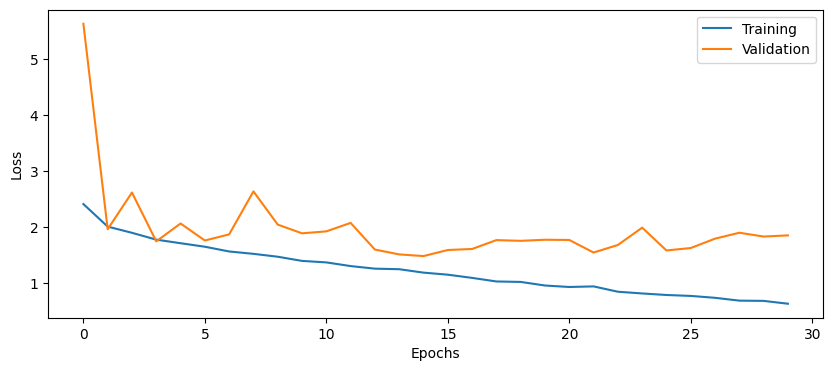

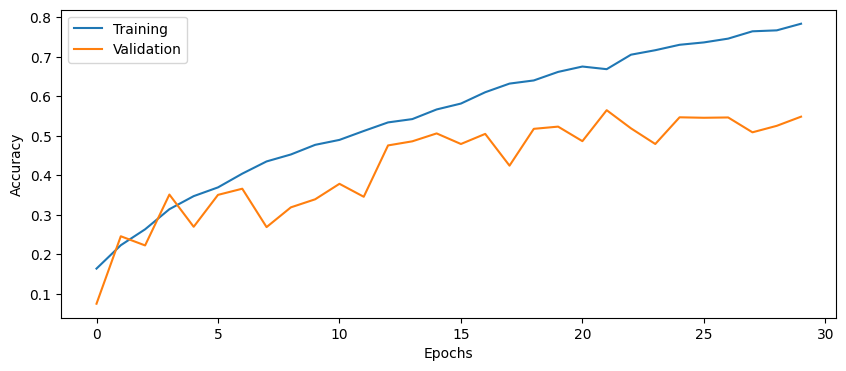

In [83]:
# Plot the history from the training run
plot_results(history5)

#### **<span style="color:green">Answer:</span>**


**Question 20** 

* The test accuracy is around 56 %. We used batch_size = 100, epochs = 30, n_conv_layers = 5, n_dense_layers = 3n_nodes=64 and use_dropout = True.

##  Part 16: Rotate the test images

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

Question 21: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.

In [102]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))
    
    return images_rot

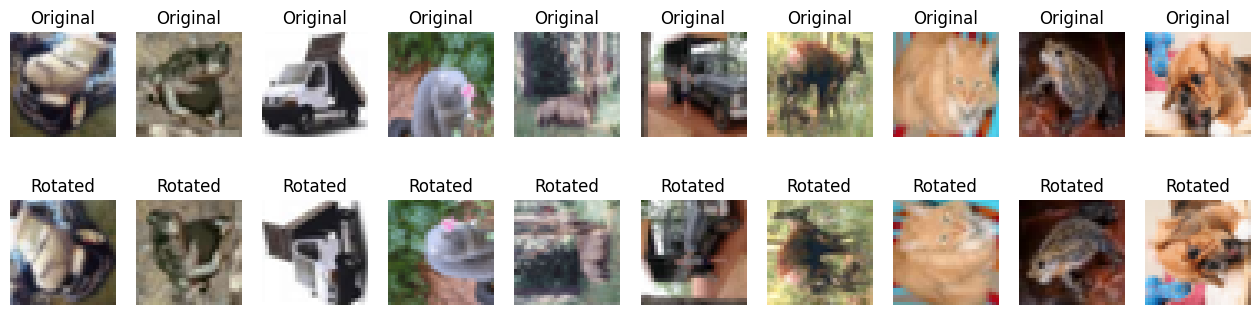

In [103]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [105]:
# Evaluate the trained model on rotated test set
score = model5.evaluate(Xtest_rotated, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 6ms/step - loss: 6.1611 - accuracy: 0.1100
Test loss: 6.1611
Test accuracy: 0.1100


#### **<span style="color:green">Answer:</span>**


**Question 21** 

* The accuracy is around 11 % compared to 56 % when we did not use rotated images. This is because the model is trained on "correctly" rotaded images.

##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator , the .flow(x,y) functionality

Make sure to use different subsets for training and validation when you setup the flows, otherwise you will validate on the same data...

In [106]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), _ = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [ ]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
# Use a rotation range of 30 degrees, horizontal and vertical flipping
from keras.preprocessing.image import ImageDataGenerator



# Setup a flow for training data, assume that we can fit all images into CPU memory


# Setup a flow for validation data, assume that we can fit all images into CPU memory


## Part 18: What about big data?

Question 22: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?

In [ ]:
# Plot some augmented images
plot_datagen = datagen.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_datagen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/api/models/model_training_apis/#fit-method for how to use model.fit with a generator instead of a fix dataset (numpy arrays)

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size
    
This is required since with a generator, the fit function will not know how many examples your original dataset has.

Question 23: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. We are here talking about the number of training epochs required to reach a certain accuracy, and not the training time in seconds. What parameter is necessary to change to perform more training?

Question 24: What other types of image augmentation can be applied, compared to what we use here?

In [ ]:
# Setup some training parameters
batch_size = 100
epochs = 200
input_shape = ?

# Build model (your best config)
model6 = 

validation_split=0.2
    
# Train the model using on the fly augmentation
history6 = 

In [ ]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

In [ ]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly, these cells are already finished.

In [ ]:
# Find misclassified images
y_pred=model6.predict(Xtest) 
y_pred=np.argmax(y_pred,axis=1)

y_correct = np.argmax(Ytest,axis=-1)

miss = np.flatnonzero(y_correct != y_pred)

In [ ]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

Question 25: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?

Question 26: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database (several million images, 1000 classes). Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

Question 27: How many convolutional layers does ResNet50 have? 

Question 28: How many trainable parameters does the ResNet50 network have? 

Question 29: What is the size of the images that ResNet50 expects as input?

Question 30: Using the answer to question 28, explain why the second derivative is seldom used when training deep networks.

Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine or your own computer. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/api/applications/ and https://keras.io/api/applications/resnet/#resnet50-function 

Useful functions

`image.load_img` in tensorflow.keras.preprocessing

`image.img_to_array` in tensorflow.keras.preprocessing

`ResNet50` in tensorflow.keras.applications.resnet50

`preprocess_input` in tensorflow.keras.applications.resnet50

`decode_predictions` in tensorflow.keras.applications.resnet50

`expand_dims` in numpy


In [ ]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice. 
# The preprocessing should transform the image to a size that is expected by the CNN.


